# Using classifier ensemble


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
df = pd.read_csv("c:/users/HP/Dropbox/Breast Cancer ML Project/breast-cancer-wisconsin-data/data.csv")
cancer_df = df.copy()    # CREATING A COPY OF THE ORIGINAL DATAFRAME
print("Shape of the data : " , cancer_df.shape )
cancer_df.head(5 )

Shape of the data :  (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Preprocessing

In [3]:
y = cancer_df.diagnosis.values 

cancer_df.drop(["Unnamed: 32" , "id", "diagnosis"] , axis = 1 , inplace= True ) 
cancer_df.head(3) 
X = cancer_df.values 

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
scaler.fit(X )
scaled_x = scaler.transform(X) 
# scaled_X is the new X 

In [6]:
# Feature selection step 
from sklearn.feature_selection import SelectKBest , f_classif 

test = SelectKBest(score_func= f_classif , k = 25 )
test.fit(scaled_x , y)
new_x = test.transform(scaled_x )

# cross validation

In [7]:
from sklearn.model_selection import cross_val_predict 

# Creating individual models

In [8]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver = "liblinear")

In [9]:
# Decision Tree Model 
from sklearn.tree import DecisionTreeClassifier 
tree_model = DecisionTreeClassifier(criterion= 'gini' , max_depth= 5, random_state= 5 ) 

In [10]:
# KNN  model 
from sklearn.neighbors import KNeighborsClassifier 
knn_model = KNeighborsClassifier(n_neighbors= 5  ) 

# voting ensemble

In [11]:
from sklearn.ensemble import VotingClassifier 

In [12]:
accuracy = [] # stores accuracy of each ensemble created
ensemble = []  # stores the name of ensemble

 <p style = "color:black; font-family :monospace ;font-size :30px ;">Logistic Regression + Decision Tree + KNN </p>

In [13]:
estimators = [("logistic" , log_model) , ("tree" , tree_model) , ("knn" , knn_model ) ]
classifier = VotingClassifier(estimators = estimators ) 

In [14]:
y_pred = cross_val_predict(classifier , new_x , y , cv = 10 ) 


# Evaluation metrics

In [15]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score 
ensemble.append("Log+DT+KNN")    
accuracy_first = round(accuracy_score(y , y_pred ) *100  , 2 ) 
accuracy.append(accuracy_first)
precision_score_first = round(precision_score(y , y_pred , average= 'weighted') * 100 ,2 ) 
recall_score_first = round(recall_score(y , y_pred,  average= 'weighted') * 100 , 2 )
f1_score_first =  round(f1_score(y , y_pred , average = 'weighted')  * 100  , 2 ) 

In [16]:
print("Accuracy score : " , accuracy_first )
print("Precision score : " , precision_score_first ) 
print("Recall score : " ,  recall_score_first ) 
print("f1 score : " , f1_score_first  )

Accuracy score :  98.24
Precision score :  98.27
Recall score :  98.24
f1 score :  98.24


<p style = "color:blue; font-family :monospace ;font-size :20px "> An ensemble of Logistic Regression , Decision Tree and KNN gives an accuracy of <b>98.24</b> </p>

<p style = "color:black; font-family :monospace ;font-size :30px ">Linear + rbf + poly + sigmoid kernels </p>

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
C = [1, 10 ,100 ,1000 ] 
gamma = [1 , 0.1 , 0.01 , 0.001 ]


In [18]:
linear = GridSearchCV(estimator= SVC() , param_grid={"C":C, "gamma":gamma ,"kernel":["linear"] } ,verbose = 4 )
rbf = GridSearchCV(estimator = SVC() , param_grid = {"C" :C , "gamma":gamma ,"kernel" : ["rbf"] } , verbose = 4 )
poly = GridSearchCV(estimator = SVC() , param_grid = {"C" :C , "gamma":gamma ,"kernel" : ["poly"] } , verbose = 4 )
sigmoid = GridSearchCV(estimator = SVC() , param_grid = {"C" :C , "gamma":gamma ,"kernel" : ["sigmoid"] } , verbose = 4 )


svc_estimators = [ ("linear" ,linear) , ("rbf" , rbf) , ("poly" , poly) , ("sigmoid" , sigmoid)]

classifier = VotingClassifier(estimators = svc_estimators )

y_pred = cross_val_predict(classifier , new_x , y , cv = 10 ) 
 

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.9707602339181286, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.9588235294117647, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.9882352941176471, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.9707602339181286, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.9588235294117647, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.9882352941176471, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear .....................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.001, kernel=linear, score=0.9411764705882353, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9705882352941176, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9411764705882353, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9470588235294117, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.9411764705882353, total=   0.0s
[CV] C=1000, gamma

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=1, kernel=rbf, score=0.6588235294117647, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.6882352941176471, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=0.9473684210526315, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=0.9411764705882353, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.01, kernel=rbf, score=0.9590643274853801, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.01, kernel=rbf, score=0.9764705882352941, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf .........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=0.001, kernel=poly, score=0.6257309941520468, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV]  C=1, gamma=0.001, kernel=poly, score=0.6294117647058823, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV]  C=1, gamma=0.001, kernel=poly, score=0.6294117647058823, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV]  C=10, gamma=1, kernel=poly, score=0.9239766081871345, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV]  C=10, gamma=1, kernel=poly, score=0.9647058823529412, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV]  C=10, gamma=1, kernel=poly, score=0.9294117647058824, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV]  C=10, gamma=0.1, kernel=poly, score=0.935672514619883, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ............

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


[CV] .......... C=1, gamma=1, kernel=sigmoid, score=0.9, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV]  C=1, gamma=0.1, kernel=sigmoid, score=0.935672514619883, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV]  C=1, gamma=0.1, kernel=sigmoid, score=0.9294117647058824, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV]  C=1, gamma=0.1, kernel=sigmoid, score=0.9470588235294117, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV]  C=1, gamma=0.01, kernel=sigmoid, score=0.9473684210526315, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV]  C=1, gamma=0.01, kernel=sigmoid, score=0.9470588235294117, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV]  C=1, gamma=0.01, kernel=sigmoid, score=0.9823529411764705, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sig

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=1, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.9764705882352941, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.9766081871345029, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.9764705882352941, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=0.9766081871345029, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=0.01, kernel=rbf, score=0.9590643274853801, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.9529411764705882, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.9882352941176471, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.935672514619883, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.9470588235294117, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6608187134502924, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf ..................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.01, kernel=poly, score=0.9411764705882353, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV]  C=100, gamma=0.001, kernel=poly, score=0.6549707602339181, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV]  C=100, gamma=0.001, kernel=poly, score=0.6588235294117647, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV]  C=100, gamma=0.001, kernel=poly, score=0.6529411764705882, total=   0.0s
[CV] C=1000, gamma=1, kernel=poly ....................................
[CV]  C=1000, gamma=1, kernel=poly, score=0.9239766081871345, total=   0.0s
[CV] C=1000, gamma=1, kernel=poly ....................................
[CV]  C=1000, gamma=1, kernel=poly, score=0.9588235294117647, total=   0.0s
[CV] C=1000, gamma=1, kernel=poly ....................................
[CV]  C=1000, gamma=1, kernel=poly, score=0.9235294117647059, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=1, kernel=sigmoid, score=0.9058823529411765, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV]  C=100, gamma=1, kernel=sigmoid, score=0.8941176470588236, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV]  C=100, gamma=0.1, kernel=sigmoid, score=0.8830409356725146, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ...... C=100, gamma=0.1, kernel=sigmoid, score=0.9, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV]  C=100, gamma=0.1, kernel=sigmoid, score=0.8764705882352941, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=100, gamma=0.01, kernel=sigmoid, score=0.9473684210526315, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=100, gamma=0.01, kernel=sigmoid, score=0.9529411764705882, total=   0.0s
[CV] C=100, gamma=0.01, k

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.01, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9415204678362573, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9415204678362573, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=1000, ga

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=1, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.6352941176470588, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9649122807017544, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9707602339181286, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.9590643274853801, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.9532163742690059, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf ..........................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.01, kernel=poly, score=0.8245614035087719, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV]  C=10, gamma=0.01, kernel=poly, score=0.8941176470588236, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV]  C=10, gamma=0.001, kernel=poly, score=0.6257309941520468, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV]  C=10, gamma=0.001, kernel=poly, score=0.631578947368421, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV]  C=10, gamma=0.001, kernel=poly, score=0.6352941176470588, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV]  C=100, gamma=1, kernel=poly, score=0.9181286549707602, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV]  C=100, gamma=1, kernel=poly, score=0.9532163742690059, total=   0.0s
[CV] C=100, gamma=1, kernel=poly ....

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


[CV]  C=10, gamma=1, kernel=sigmoid, score=0.9005847953216374, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV]  C=10, gamma=1, kernel=sigmoid, score=0.9058823529411765, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV]  C=10, gamma=0.1, kernel=sigmoid, score=0.8888888888888888, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV]  C=10, gamma=0.1, kernel=sigmoid, score=0.8947368421052632, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV]  C=10, gamma=0.1, kernel=sigmoid, score=0.9117647058823529, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9649122807017544, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9590643274853801, total=   0.0s
[CV] C=10, gamma=0.01, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.01, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV]  C=10, gamma=0.01, kernel=linear, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV]  C=10, gamma=0.01, kernel=linear, score=0.9294117647058824, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV]  C=10, gamma=0.001, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV]  C=10, gamma=0.001, kernel=linear, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV]  C=10, gamma=0.001, kernel=linear, score=0.9294117647058824, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV]  C=100, gamma=1, kernel=linear, score=0.9532163742690059, total=   0.0s
[CV] C=100, gamma=1,

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=1, kernel=rbf, score=0.6374269005847953, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.6411764705882353, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9590643274853801, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9707602339181286, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9764705882352941, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.9473684210526315, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.9473684210526315, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .........................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.1, kernel=poly, score=0.9705882352941176, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV]  C=10, gamma=0.01, kernel=poly, score=0.8304093567251462, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV]  C=10, gamma=0.01, kernel=poly, score=0.8187134502923976, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV]  C=10, gamma=0.01, kernel=poly, score=0.8941176470588236, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV]  C=10, gamma=0.001, kernel=poly, score=0.6257309941520468, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV]  C=10, gamma=0.001, kernel=poly, score=0.631578947368421, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV]  C=10, gamma=0.001, kernel=poly, score=0.6352941176470588, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


[CV]  C=1, gamma=0.001, kernel=sigmoid, score=0.9705882352941176, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV]  C=10, gamma=1, kernel=sigmoid, score=0.8070175438596491, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV]  C=10, gamma=1, kernel=sigmoid, score=0.9005847953216374, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV]  C=10, gamma=1, kernel=sigmoid, score=0.9176470588235294, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV]  C=10, gamma=0.1, kernel=sigmoid, score=0.8771929824561403, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV]  C=10, gamma=0.1, kernel=sigmoid, score=0.9122807017543859, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] ....... C=10, gamma=0.1, kernel=sigmoid, score=0.9, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.01, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV]  C=10, gamma=0.01, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV]  C=10, gamma=0.001, kernel=linear, score=0.9532163742690059, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV]  C=10, gamma=0.001, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV]  C=10, gamma=0.001, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV]  C=100, gamma=1, kernel=linear, score=0.9590643274853801, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV]  C=100, gamma=1, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=100, gamma=1, k

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=0.001, kernel=rbf, score=0.9239766081871345, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.9705882352941176, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6432748538011696, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6608187134502924, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6764705882352942, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9473684210526315, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9649122807017544, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf ....................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.001, kernel=poly, score=0.6491228070175439, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV]  C=100, gamma=0.001, kernel=poly, score=0.6529411764705882, total=   0.0s
[CV] C=1000, gamma=1, kernel=poly ....................................
[CV]  C=1000, gamma=1, kernel=poly, score=0.9415204678362573, total=   0.0s
[CV] C=1000, gamma=1, kernel=poly ....................................
[CV]  C=1000, gamma=1, kernel=poly, score=0.935672514619883, total=   0.0s
[CV] C=1000, gamma=1, kernel=poly ....................................
[CV]  C=1000, gamma=1, kernel=poly, score=0.9117647058823529, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=poly ..................................
[CV]  C=1000, gamma=0.1, kernel=poly, score=0.9415204678362573, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=poly ..................................
[CV]  C=1000, gamma=0.1, kernel=poly, score=0.935672514619883, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=pol

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


[CV]  C=100, gamma=0.1, kernel=sigmoid, score=0.9058823529411765, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=100, gamma=0.01, kernel=sigmoid, score=0.9707602339181286, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=100, gamma=0.01, kernel=sigmoid, score=0.9473684210526315, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=100, gamma=0.01, kernel=sigmoid, score=0.9411764705882353, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.9649122807017544, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.9649122807017544, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.9647058823529412, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.01, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9058823529411765, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9058823529411765, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9590643274853801, total=   0.0s
[CV] C=1000, 

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9883040935672515, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9823529411764705, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9590643274853801, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9590643274853801, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9823529411764705, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=1, kernel=poly, score=0.9294117647058824, total=   0.0s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV]  C=100, gamma=0.1, kernel=poly, score=0.9415204678362573, total=   0.0s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV]  C=100, gamma=0.1, kernel=poly, score=0.9415204678362573, total=   0.0s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV]  C=100, gamma=0.1, kernel=poly, score=0.9294117647058824, total=   0.0s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV]  C=100, gamma=0.01, kernel=poly, score=0.8947368421052632, total=   0.0s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV]  C=100, gamma=0.01, kernel=poly, score=0.8654970760233918, total=   0.0s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV]  C=100, gamma=0.01, kernel=poly, score=0.9529411764705882, total=   0.0s
[CV] C=100, gamma=0.001, kernel=po

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.001, kernel=sigmoid, score=0.9823529411764705, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV]  C=100, gamma=1, kernel=sigmoid, score=0.8654970760233918, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV]  C=100, gamma=1, kernel=sigmoid, score=0.9005847953216374, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV]  C=100, gamma=1, kernel=sigmoid, score=0.8941176470588236, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV]  C=100, gamma=0.1, kernel=sigmoid, score=0.9005847953216374, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV]  C=100, gamma=0.1, kernel=sigmoid, score=0.9122807017543859, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV]  C=100, gamma=0.1, kernel=sigmoid, score=0.8705882352941177, total=   0.0s
[CV] C=100, gamma=0

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


[CV]  C=100, gamma=0.01, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9235294117647059, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9235294117647059, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=1000, ga

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=1, kernel=rbf, score=0.6549707602339181, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6823529411764706, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9532163742690059, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9764705882352941, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9824561403508771, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9824561403508771, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf .................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1000, gamma=1, kernel=poly, score=0.9239766081871345, total=   0.0s
[CV] C=1000, gamma=1, kernel=poly ....................................
[CV]  C=1000, gamma=1, kernel=poly, score=0.935672514619883, total=   0.0s
[CV] C=1000, gamma=1, kernel=poly ....................................
[CV]  C=1000, gamma=1, kernel=poly, score=0.9470588235294117, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=poly ..................................
[CV]  C=1000, gamma=0.1, kernel=poly, score=0.9239766081871345, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=poly ..................................
[CV]  C=1000, gamma=0.1, kernel=poly, score=0.935672514619883, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=poly ..................................
[CV]  C=1000, gamma=0.1, kernel=poly, score=0.9470588235294117, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=poly .................................
[CV]  C=1000, gamma=0.01, kernel=poly, score=0.9298245614035088, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=pol

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.9058823529411765, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=sigmoid ...............................
[CV]  C=1000, gamma=0.1, kernel=sigmoid, score=0.8947368421052632, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=sigmoid ...............................
[CV]  C=1000, gamma=0.1, kernel=sigmoid, score=0.9064327485380117, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=sigmoid ...............................
[CV]  C=1000, gamma=0.1, kernel=sigmoid, score=0.8823529411764706, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=1000, gamma=0.01, kernel=sigmoid, score=0.9649122807017544, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=1000, gamma=0.01, kernel=sigmoid, score=0.9590643274853801, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=1000, gamma=0.01, kernel=sigmoid, score=0.9352941176470588, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1000, gamma=1, kernel=linear, score=0.9235294117647059, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.9593023255813954, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.9298245614035088, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.9235294117647059, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV]  C=1000, gamma=0.01, kernel=linear, score=0.9593023255813954, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV]  C=1000, gamma=0.01, kernel=linear, score=0.9298245614035088, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV]  C=1000, gamma=0.01, kernel=linear, score=0.9235294117647059, total=   0.0s
[CV] C=1000, 

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=1, kernel=rbf, score=0.6608187134502924, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6764705882352942, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9418604651162791, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9766081871345029, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9767441860465116, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9824561403508771, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf .................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1000, gamma=1, kernel=poly, score=0.9470588235294117, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=poly ..................................
[CV]  C=1000, gamma=0.1, kernel=poly, score=0.9418604651162791, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=poly ..................................
[CV]  C=1000, gamma=0.1, kernel=poly, score=0.9473684210526315, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=poly ..................................
[CV]  C=1000, gamma=0.1, kernel=poly, score=0.9470588235294117, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=poly .................................
[CV]  C=1000, gamma=0.01, kernel=poly, score=0.9418604651162791, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=poly .................................
[CV]  C=1000, gamma=0.01, kernel=poly, score=0.9181286549707602, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=poly .................................
[CV]  C=1000, gamma=0.01, kernel=poly, score=0.9647058823529412, total=   0.0s
[CV] C=1000, gamma=0.001, k

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.9709302325581395, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.9766081871345029, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.9529411764705882, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.872093023255814, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.8830409356725146, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.9058823529411765, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=sigmoid ...............................
[CV]  C=1000, gamma=0.1, kernel=sigmoid, score=0.9127906976744186, total=   0.0s
[CV] C=1000

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9415204678362573, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9117647058823529, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9476744186046512, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9415204678362573, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9117647058823529, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.9476744186046512, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, k

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=1, kernel=rbf, score=0.6608187134502924, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.6764705882352942, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=0.936046511627907, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=0.9649122807017544, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=0.9705882352941176, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.01, kernel=rbf, score=0.9534883720930233, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.01, kernel=rbf, score=0.9649122807017544, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ..........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=1, kernel=poly, score=0.9186046511627907, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV]  C=10, gamma=1, kernel=poly, score=0.9415204678362573, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV]  C=10, gamma=1, kernel=poly, score=0.9470588235294117, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV]  C=10, gamma=0.1, kernel=poly, score=0.9593023255813954, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV]  C=10, gamma=0.1, kernel=poly, score=0.9473684210526315, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV]  C=10, gamma=0.1, kernel=poly, score=0.9529411764705882, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV]  C=10, gamma=0.01, kernel=poly, score=0.8430232558139535, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ............

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=0.001, kernel=sigmoid, score=0.9069767441860465, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV]  C=1, gamma=0.001, kernel=sigmoid, score=0.9298245614035088, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV]  C=1, gamma=0.001, kernel=sigmoid, score=0.9470588235294117, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV]  C=10, gamma=1, kernel=sigmoid, score=0.8953488372093024, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV]  C=10, gamma=1, kernel=sigmoid, score=0.8654970760233918, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV]  C=10, gamma=1, kernel=sigmoid, score=0.9117647058823529, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV]  C=10, gamma=0.1, kernel=sigmoid, score=0.8953488372093024, total=   0.0s
[CV] C=10, gamma=0.1, ke

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=1, kernel=linear, score=0.9764705882352941, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=0.9651162790697675, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=0.9532163742690059, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=0.9764705882352941, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV]  C=10, gamma=0.01, kernel=linear, score=0.9651162790697675, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV]  C=10, gamma=0.01, kernel=linear, score=0.9532163742690059, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV]  C=10, gamma=0.01, kernel=linear, score=0.9764705882352941, total=   0.0s
[CV] C=10, gamma=0.001, ker

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=0.001, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6569767441860465, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6549707602339181, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6647058823529411, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.936046511627907, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9649122807017544, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9823529411764705, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf .....................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1000, gamma=1, kernel=poly, score=0.9534883720930233, total=   0.0s
[CV] C=1000, gamma=1, kernel=poly ....................................
[CV]  C=1000, gamma=1, kernel=poly, score=0.9415204678362573, total=   0.0s
[CV] C=1000, gamma=1, kernel=poly ....................................
[CV]  C=1000, gamma=1, kernel=poly, score=0.9470588235294117, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=poly ..................................
[CV]  C=1000, gamma=0.1, kernel=poly, score=0.9534883720930233, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=poly ..................................
[CV]  C=1000, gamma=0.1, kernel=poly, score=0.9415204678362573, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=poly ..................................
[CV]  C=1000, gamma=0.1, kernel=poly, score=0.9470588235294117, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=poly .................................
[CV]  C=1000, gamma=0.01, kernel=poly, score=0.9418604651162791, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=p

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


In [19]:
# Evaluation metrics

ensemble.append("linear+rbf+poly+sigmoid")
accuracy_second = round(accuracy_score(y , y_pred ) *100  , 2 ) 
accuracy.append(accuracy_second)
precision_score_second = round(precision_score(y , y_pred , average= 'weighted') * 100 ,2 ) 
recall_score_second = round(recall_score(y , y_pred,  average= 'weighted') * 100 , 2 )
f1_score_second =  round(f1_score(y , y_pred , average = 'weighted')  * 100  , 2 ) 

print("Accuracy score : " , accuracy_second )
print("Precision score : " , precision_score_second ) 
print("Recall score : " ,  recall_score_second ) 
print("f1 score : " , f1_score_second  )

Accuracy score :  97.54
Precision score :  97.54
Recall score :  97.54
f1 score :  97.53


<p style = "color:blue; font-family :monospace ;font-size :20px "> Ensemble of linear , rbf , poly and sigmoid kernels gives an accuracy of <b>97.54</b> </p>

# Combining all classifiers

In [20]:
# log_model + knn_model + tree_model + linear + rbf + poly + sigmoid

all_estimators = [("log_model" , log_model), ("knn_model" , knn_model) ,("tree_model" , tree_model) ,  
                  ("linear" , linear) , ("rbf" , rbf)  , ("sigmoid" , sigmoid) ]

classifier = VotingClassifier(estimators = all_estimators )

y_pred = cross_val_predict(classifier , new_x , y , cv = 10 )

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.9707602339181286, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.9588235294117647, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.9882352941176471, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.9707602339181286, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.9588235294117647, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.9882352941176471, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear .....................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9705882352941176, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9411764705882353, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9705882352941176, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9411764705882353, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, k

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=1, kernel=rbf, score=0.6882352941176471, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=0.9473684210526315, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=0.9411764705882353, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.01, kernel=rbf, score=0.9590643274853801, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.01, kernel=rbf, score=0.9764705882352941, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.01, kernel=rbf, score=0.9705882352941176, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf .....

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


[CV]  C=10, gamma=0.1, kernel=sigmoid, score=0.9235294117647059, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV]  C=10, gamma=0.1, kernel=sigmoid, score=0.9352941176470588, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9649122807017544, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9705882352941176, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9647058823529412, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.001, kernel=sigmoid, score=0.9473684210526315, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.001, kernel=sigmoid, score=0.9470588235294117, total=   0.0s
[CV] C=10, gam

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=1, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV]  C=100, gamma=1, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV]  C=100, gamma=1, kernel=linear, score=0.9411764705882353, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV]  C=100, gamma=0.1, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV]  C=100, gamma=0.1, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV]  C=100, gamma=0.1, kernel=linear, score=0.9411764705882353, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=100, gamma=0.01, ke

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9824561403508771, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9705882352941176, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9823529411764705, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9529411764705882, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9823529411764705, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.6608187134502924, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf .........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.9824561403508771, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.9705882352941176, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.9764705882352941, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.8362573099415205, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.9058823529411765, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.8941176470588236, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=sigmoid ...............................
[CV]  C=1000, gamma=0.1, kernel=sigmoid, score=0.8830409356725146, total=   0.0s
[CV] C=100

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.1, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9415204678362573, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9415204678362573, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=1000,

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=1, kernel=rbf, score=0.6549707602339181, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6491228070175439, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6705882352941176, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9532163742690059, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9649122807017544, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9705882352941176, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1000, gamma=0.1, kernel=sigmoid, score=0.8888888888888888, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=sigmoid ...............................
[CV]  C=1000, gamma=0.1, kernel=sigmoid, score=0.8947368421052632, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=sigmoid ...............................
[CV]  C=1000, gamma=0.1, kernel=sigmoid, score=0.9117647058823529, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=1000, gamma=0.01, kernel=sigmoid, score=0.9590643274853801, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=1000, gamma=0.01, kernel=sigmoid, score=0.9473684210526315, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=sigmoid ..............................
[CV] .... C=1000, gamma=0.01, kernel=sigmoid, score=0.9, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=sigmoid .............................
[CV]  C=1000, gamma=0.001, kernel=sigmoid, score=0.9649122807017544, total=   0.0s
[CV] C=1000, 

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.001, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9235294117647059, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9532163742690059, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.8941176470588236, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.9532163742690059, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=1000, gamma

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9529411764705882, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9649122807017544, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9882352941176471, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9590643274853801, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9473684210526315, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf .......

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.9764705882352941, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.9764705882352941, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=0.9

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.1, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV]  C=10, gamma=0.01, kernel=linear, score=0.9532163742690059, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV]  C=10, gamma=0.01, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV]  C=10, gamma=0.01, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV]  C=10, gamma=0.001, kernel=linear, score=0.9532163742690059, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV]  C=10, gamma=0.001, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV]  C=10, gamma=0.001, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=100, gamma=1

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=0.001, kernel=rbf, score=0.9122807017543859, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.9239766081871345, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.9705882352941176, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6432748538011696, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6608187134502924, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6764705882352942, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9473684210526315, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf ...................

[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9473684210526315, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9470588235294117, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.001, kernel=sigmoid, score=0.935672514619883, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.001, kernel=sigmoid, score=0.9415204678362573, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.001, kernel=sigmoid, score=0.9764705882352941, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV]  C=100, gamma=1, kernel=sigmoid, score=0.8245614035087719, total=   0.0s
[CV] C=100, ga

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.8245614035087719, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.8947368421052632, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.9176470588235294, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=sigmoid ...............................
[CV]  C=1000, gamma=0.1, kernel=sigmoid, score=0.9005847953216374, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=sigmoid ...............................
[CV]  C=1000, gamma=0.1, kernel=sigmoid, score=0.9064327485380117, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=sigmoid ...............................
[CV]  C=1000, gamma=0.1, kernel=sigmoid, score=0.9058823529411765, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=1000, gamma=0.01, kernel=sigmoid, score=0.9532163742690059, total=   0.0s
[CV] C=1000,

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.01, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9058823529411765, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9058823529411765, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9590643274853801, total=   0.0s
[CV] C=1000, 

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=1, kernel=rbf, score=0.6823529411764706, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.935672514619883, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9883040935672515, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9823529411764705, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ..............

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.1, kernel=sigmoid, score=0.8705882352941177, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=100, gamma=0.01, kernel=sigmoid, score=0.9415204678362573, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=100, gamma=0.01, kernel=sigmoid, score=0.9473684210526315, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=100, gamma=0.01, kernel=sigmoid, score=0.9176470588235294, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.9824561403508771, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.9707602339181286, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.9823529411764705, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] C=10, gamma=1, kernel=linear ....................................
[CV]  C=10, gamma=1, kernel=linear, score=0.9532163742690059, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV]  C=10, gamma=1, kernel=linear, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV]  C=10, gamma=1, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=0.9532163742690059, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV]  C=10, gamma=0.01, kernel=linear, sc

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9532163742690059, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9764705882352941, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9824561403508771, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9824561403508771, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9823529411764705, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9649122807017544, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf .........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


[CV]  C=1000, gamma=0.1, kernel=sigmoid, score=0.9064327485380117, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=sigmoid ...............................
[CV]  C=1000, gamma=0.1, kernel=sigmoid, score=0.8823529411764706, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=1000, gamma=0.01, kernel=sigmoid, score=0.9649122807017544, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=1000, gamma=0.01, kernel=sigmoid, score=0.9590643274853801, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=1000, gamma=0.01, kernel=sigmoid, score=0.9352941176470588, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=sigmoid .............................
[CV]  C=1000, gamma=0.001, kernel=sigmoid, score=0.9590643274853801, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=sigmoid .............................
[CV]  C=1000, gamma=0.001, kernel=sigmoid, score=0.9649122807017544, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.001, kernel=linear, score=0.9352941176470588, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9593023255813954, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9298245614035088, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9235294117647059, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.9593023255813954, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.9298245614035088, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.9235294117647059, total=   0.0s
[CV] C=1000, gamma=

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=1, kernel=rbf, score=0.6764705882352942, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9418604651162791, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9766081871345029, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9767441860465116, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9824561403508771, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9588235294117647, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf .............

[CV]  C=10, gamma=0.001, kernel=sigmoid, score=0.9705882352941176, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV]  C=100, gamma=1, kernel=sigmoid, score=0.872093023255814, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV]  C=100, gamma=1, kernel=sigmoid, score=0.8830409356725146, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV]  C=100, gamma=1, kernel=sigmoid, score=0.9058823529411765, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV]  C=100, gamma=0.1, kernel=sigmoid, score=0.9127906976744186, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV]  C=100, gamma=0.1, kernel=sigmoid, score=0.8888888888888888, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV]  C=100, gamma=0.1, kernel=sigmoid, score=0.9235294117647059, total=   0.0s
[CV] C=100, gamma=0.

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


[CV] C=1000, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=1000, gamma=0.01, kernel=sigmoid, score=0.9239766081871345, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=1000, gamma=0.01, kernel=sigmoid, score=0.9294117647058824, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=sigmoid .............................
[CV]  C=1000, gamma=0.001, kernel=sigmoid, score=0.9709302325581395, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=sigmoid .............................
[CV]  C=1000, gamma=0.001, kernel=sigmoid, score=0.9590643274853801, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=sigmoid .............................
[CV]  C=1000, gamma=0.001, kernel=sigmoid, score=0.9470588235294117, total=   0.0s
Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.9651162790697675, total=   0.0s
[CV] C=1, gamma=1, kernel

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.001, kernel=linear, score=0.9415204678362573, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9117647058823529, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9476744186046512, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9415204678362573, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9117647058823529, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.9476744186046512, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.9415204678362573, total=   0.0s
[CV] C=1000, gamma

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9766081871345029, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9588235294117647, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9651162790697675, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9590643274853801, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.6569767441860465, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.6608187134502924, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ...........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.8837209302325582, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.8830409356725146, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.9117647058823529, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=sigmoid ...............................
[CV]  C=1000, gamma=0.1, kernel=sigmoid, score=0.9011627906976745, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=sigmoid ...............................
[CV]  C=1000, gamma=0.1, kernel=sigmoid, score=0.8830409356725146, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=sigmoid ...............................
[CV]  C=1000, gamma=0.1, kernel=sigmoid, score=0.9176470588235294, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=1000, gamma=0.01, kernel=sigmoid, score=0.9302325581395349, total=   0.0s
[CV] C=1000,

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=1, kernel=linear, score=0.9470588235294117, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV]  C=100, gamma=0.1, kernel=linear, score=0.9709302325581395, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV]  C=100, gamma=0.1, kernel=linear, score=0.9415204678362573, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV]  C=100, gamma=0.1, kernel=linear, score=0.9470588235294117, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9709302325581395, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9415204678362573, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9470588235294117, total=   0.0s
[CV] C=100, gamma=0.

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9823529411764705, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.6569767441860465, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.6549707602339181, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.6647058823529411, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=0.9418604651162791, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=0.9649122807017544, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ............

[CV]  C=100, gamma=0.01, kernel=sigmoid, score=0.9473684210526315, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=100, gamma=0.01, kernel=sigmoid, score=0.9705882352941176, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.9709302325581395, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.9824561403508771, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.9705882352941176, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.8488372093023255, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.9239766081871345, total=   0.0s
[CV] C=1

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1000, gamma=0.01, kernel=sigmoid, score=0.9415204678362573, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=1000, gamma=0.01, kernel=sigmoid, score=0.9647058823529412, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=sigmoid .............................
[CV]  C=1000, gamma=0.001, kernel=sigmoid, score=0.9593023255813954, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=sigmoid .............................
[CV]  C=1000, gamma=0.001, kernel=sigmoid, score=0.9707602339181286, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=sigmoid .............................
[CV]  C=1000, gamma=0.001, kernel=sigmoid, score=0.9764705882352941, total=   0.0s


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


In [21]:
# Evaluation metrics

ensemble.append("ALL")
accuracy_third = round(accuracy_score(y , y_pred ) *100  , 2 ) 
accuracy.append(accuracy_third)
precision_score_third = round(precision_score(y , y_pred , average= 'weighted') * 100 ,2 ) 
recall_score_third = round(recall_score(y , y_pred,  average= 'weighted') * 100 , 2 )
f1_score_third =  round(f1_score(y , y_pred , average = 'weighted')  * 100  , 2 ) 

print("Accuracy score : " , accuracy_third )
print("Precision score : " , precision_score_third ) 
print("Recall score : " ,  recall_score_third ) 
print("f1 score : " , recall_score_third  )

Accuracy score :  97.54
Precision score :  97.56
Recall score :  97.54
f1 score :  97.54


<p style = "color:blue; font-family :monospace ;font-size :20px "> Combining all classifier gives an accuracy of <b>97.54</b> </p>

<p style = "color:black; font-family :monospace ;font-size :30px ">KNN + Tree + rbf </p>

In [22]:
# KNN + Tree + rbf 

new_estimators = [("knn_model" , knn_model)  , ("tree_model" , tree_model) , ("rbf" , rbf)] 
classifier = VotingClassifier(estimators = new_estimators)

y_pred = cross_val_predict(classifier , new_x , y , cv = 10 )
    

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.6352941176470588, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.6470588235294118, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9590643274853801, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9941176470588236, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9473684210526315, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9470588235294117, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9764705882352941, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.6549707602339181, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.6588235294117647, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.6882352941176471, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ...........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.6374269005847953, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.6470588235294118, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.6411764705882353, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9649122807017544, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9529411764705882, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9764705882352941, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.9590643274853801, tota

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=1, kernel=rbf, score=0.6549707602339181, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.6491228070175439, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.6705882352941176, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=0.9532163742690059, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=0.9532163742690059, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=0.9529411764705882, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.01, kernel=rbf, score=0.9473684210526315, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ............

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.6549707602339181, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.6647058823529411, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=0.9415204678362573, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=0.9707602339181286, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=0.9529411764705882, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.01, kernel=rbf, score=0.9532163742690059, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.01, kernel=rbf, score=0.9707

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9941176470588236, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9473684210526315, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9532163742690059, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9823529411764705, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.6432748538011696, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf .........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9883040935672515, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9823529411764705, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9590643274853801, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9590643274853801, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf .......

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9590643274853801, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9823529411764705, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.6491228070175439, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.6549707602339181, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.6823529411764706, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=0.9532163742690059, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=0.9707602339181286, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ............

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=1, kernel=rbf, score=0.6432748538011696, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.6529411764705882, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9534883720930233, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9941520467836257, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9470588235294117, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.9534883720930233, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.9649122807017544, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .........................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=0.01, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.9302325581395349, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.9415204678362573, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.9470588235294117, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6569767441860465, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6608187134502924, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6764705882352942, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf ...................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.1, kernel=rbf, score=0.936046511627907, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9649122807017544, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9823529411764705, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9825581395348837, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9766081871345029, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9764705882352941, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9709302325581395, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ..........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished


In [23]:
# Evaluation metrics

ensemble.append("KNN+DT+rbf")
accuracy_fourth = round(accuracy_score(y , y_pred ) *100  , 2 ) 
accuracy.append(accuracy_fourth)
precision_score_fourth = round(precision_score(y , y_pred , average= 'weighted') * 100 ,2 ) 
recall_score_fourth = round(recall_score(y , y_pred,  average= 'weighted') * 100 , 2 )
f1_score_fourth =  round(f1_score(y , y_pred , average = 'weighted')  * 100  , 2 ) 

print("Accuracy score : " , accuracy_fourth )
print("Precision score : " , precision_score_fourth ) 
print("Recall score : " ,  recall_score_fourth ) 
print("f1 score : " , f1_score_fourth  )

Accuracy score :  98.07
Precision score :  98.09
Recall score :  98.07
f1 score :  98.06


<p style = "color:blue; font-family :monospace ;font-size :20px "> Ensemble of KNN , Decision Tree and RBF classifier gives an accuracy of <b>98.07</b> </p>

<p style = "color:black; font-family :monospace ;font-size :30px ">KNN + Tree + Linear  </p>

In [24]:
# KNN +  Tree + linear 

new_estimators = [("knn_model" , knn_model), ("tree_model" , tree_model) , ("linear" , linear)] 
classifier = VotingClassifier(estimators = new_estimators)


y_pred = cross_val_predict(classifier , new_x , y , cv =10 )


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.9707602339181286, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.9588235294117647, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.9882352941176471, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.9707602339181286, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.9588235294117647, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.9882352941176471, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear .....................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.01, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9411764705882353, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9411764705882353, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=1000, ga

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.1, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV]  C=100, gamma=0.1, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9415204678362573, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9415204678362573, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=100, ga

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.01, kernel=linear, score=0.9235294117647059, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9532163742690059, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9235294117647059, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9532163742690059, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.8941176470588236, total=   0.0s
[CV] C=1000, gamm

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.01, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9470588235294117, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9590643274853801, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9470588235294117, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9532163742690059, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=1000, ga

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.1, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV]  C=100, gamma=0.1, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV]  C=100, gamma=0.1, kernel=linear, score=0.9058823529411765, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9058823529411765, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=100, gamm

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.001, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9235294117647059, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9117647058823529, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=1000, gamm

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV] C=100, gamma=0.1, kernel=linear .................................
[CV]  C=100, gamma=0.1, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV]  C=100, gamma=0.1, kernel=linear, score=0.9352941176470588, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9651162790697675, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9352941176470588, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9651162790697675, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.00

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1000, gamma=1, kernel=linear, score=0.9476744186046512, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9415204678362573, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9117647058823529, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.9476744186046512, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.9415204678362573, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.9117647058823529, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV]  C=1000, gamma=0.01, kernel=linear, score=0.9476744186046512, total=   0.0s
[CV] C=1000, gamma=

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.1, kernel=linear, score=0.9470588235294117, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9709302325581395, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9415204678362573, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9470588235294117, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9709302325581395, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9415204678362573, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9470588235294117, total=   0.0s
[CV] C=1000,

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished


In [25]:
#  Evaluation metrics
ensemble.append("KNN+DT+linear")
accuracy_fifth = round(accuracy_score(y , y_pred ) *100  , 2 ) 
accuracy.append(accuracy_fifth)
precision_score_fifth = round(precision_score(y , y_pred , average= 'weighted') * 100 ,2 ) 
recall_score_fifth = round(recall_score(y , y_pred,  average= 'weighted') * 100 , 2 )
f1_score_fifth =  round(f1_score(y , y_pred , average = 'weighted')  * 100  , 2 ) 

print("Accuracy score : " , accuracy_fifth )
print("Precision score : " , precision_score_fifth ) 
print("Recall score : " ,  recall_score_fifth ) 
print("f1 score : " , f1_score_fifth  )

Accuracy score :  97.72
Precision score :  97.73
Recall score :  97.72
f1 score :  97.71


<p style = "color:blue; font-family :monospace ;font-size :20px "> Ensemble of KNN , Decision Tree and linear classifier gives an accuracy of <b>97.71</b> </p>

# Visualization 

In [26]:
ensemble_df = pd.DataFrame({"Ensemble":ensemble , "Accuracy" : accuracy }) 
ensemble_df

,Ensemble,Accuracy
0,Log+DT+KNN,98.24
1,linear+rbf+poly+sigmoid,97.54
2,ALL,97.54
3,KNN+DT+rbf,98.07
4,KNN+DT+linear,97.72


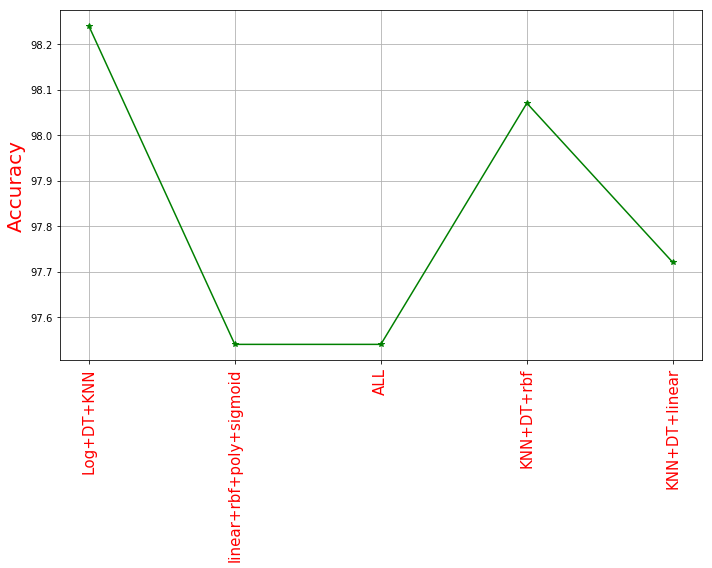

In [27]:
plt.figure(figsize = (10, 8)) 
plt.plot( ensemble , accuracy , marker = "*" , color = "green")
plt.ylabel("Accuracy" , color = "red" , fontsize= 20 )
plt.xticks(color = "red" , fontsize = 15 , rotation = 90) 
plt.grid(True)
plt.tight_layout()
plt.savefig("ensemble.png")
plt.show()


# End of fourth analysis